- SOURCES:

https://www.tensorflow.org/tutorials/keras/classification

https://www.youtube.com/playlist?list=PLzMcBGfZo4-lak7tiFDec5_ZMItiIIfmj

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sourcing data from the keras dataset:

data = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [24]:
# Sourced from tensorflow example linked above:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

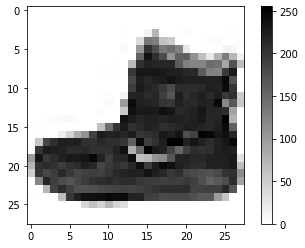

In [25]:
# Showing one image from the dataset:

plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.show()

- The pixel values above range from 0 to 255, as shown by the color bar. 
- Typically better to shrink a range including large numbers down to one that's a bit smaller.
- So we will reduce all values by a factor of 255 to get a range between 0 and 1.

In [26]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# We can do this b/c these are stored as numpy arrays

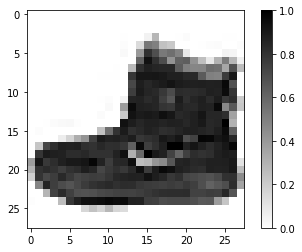

In [27]:
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.show()

- Below shows the arrays (lists) that make up the image above.
- Each image line is made up of 28 pixels (now ranging between 0 and 1)
- You can see above the image length is 28x28 = 784 pixels

In [19]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

- We will need to flatten this list of lists so that instead of one element feeding into our neural network, we have 784 neurons.

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #flatting the input as described abobve
    
    keras.layers.Dense(128, activation="relu"),  # Dense means a fully connected (in this case hidden) layer
    # we have set 128 neurons to this hidden layer and chosen the activation function of rectify linear unit
    
    keras.layers.Dense(10, activation="softmax") # this is our output layer, 0-10 b/c there are ten labels
    # we have chosen softmax to make the model designate the highest reponse as 1 (i.e. certain), rather than the true value
    
])

- Article on choosing activation functions:
https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

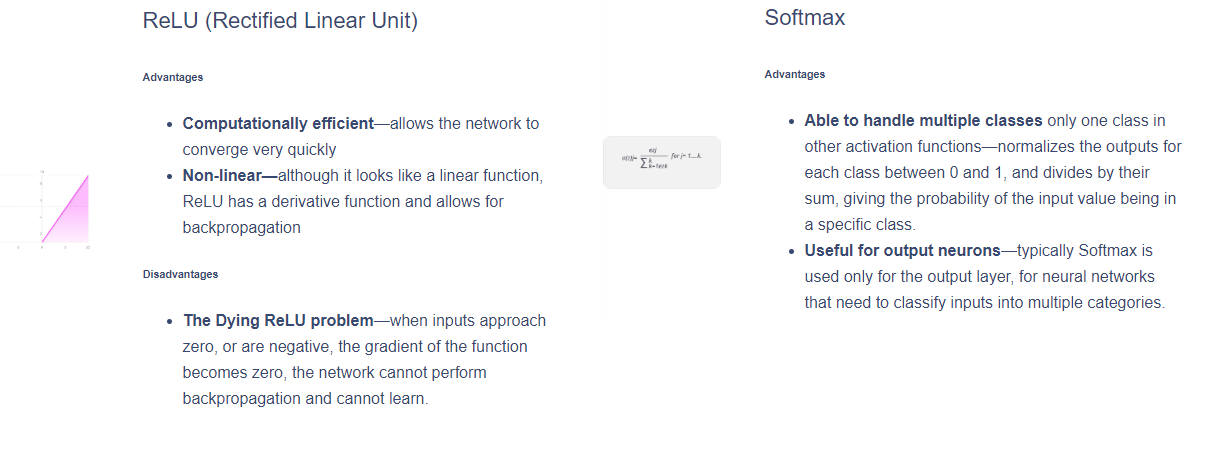

In [37]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

- Some notes on Adam as an optimization algorithm: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

# Training the Model:

In [38]:
model.fit(train_images, train_labels, epochs = 7)  # epochs is how many times the algo see's each image (but in diff order)

Epoch 1/7
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4982 - accuracy: 0.8259
Epoch 2/7
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3737 - accuracy: 0.8669
Epoch 3/7
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3359 - accuracy: 0.8781
Epoch 4/7
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3145 - accuracy: 0.8838
Epoch 5/7
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2965 - accuracy: 0.8899
Epoch 6/7
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2793 - accuracy: 0.8965
Epoch 7/7
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2678 - accuracy: 0.9000


# Testing Accuracy Using Test Data:

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Tested Accuracy:", test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3454 - accuracy: 0.8770
Tested Accuracy: 0.877


# Making Predictions:

In [41]:
prediction = model.predict(test_images)
print(prediction[0])

[1.2020387e-08 2.9875221e-08 2.5552105e-09 6.2104760e-10 1.0127506e-09
 4.6143483e-04 3.4846821e-08 2.7231965e-02 1.3272646e-06 9.7230524e-01]


In [44]:
# This goes through the list above and prints out the index of the largest neuron:

print(class_names[np.argmax(prediction[0])])

Ankle boot


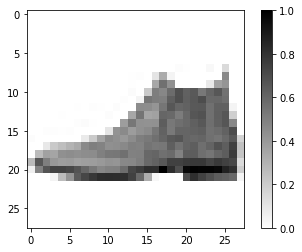

In [45]:
# Checking this vs. the actual test image:

plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.show()

- Doing this for multiple images:

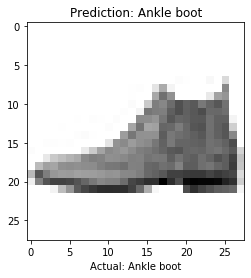

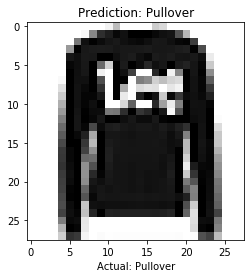

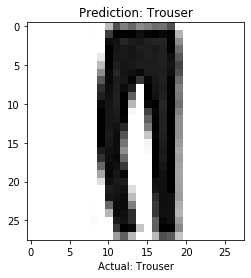

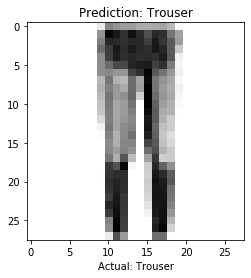

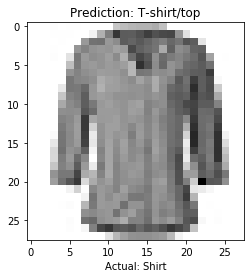

In [46]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()